In [222]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [223]:
import seaborn as sns

In [224]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [225]:
sns.set_context('poster', font_scale=1.25)

We are solving

$$\frac{df}{dt}=-(\vec{v}\cdot \nabla)f + D \nabla^2 f + sf(1-f)$$

in two dimensions.

In [5]:
from adr_2d.solver import Solver

In [6]:
import skimage as ski
import skimage.io

In [7]:
import time

In [8]:
num_points = 400

imax = num_points
jmax = num_points
kmax = 10000
dt = 0.01

dr = 1./num_points

Let us create an interesting flow-field. It wil be similar to our experiment...

In [9]:
rot_speed1 = .01*dt
rot_speed2 = .01*dt
vortex1 = [imax/2, jmax/4]
vortex2 = [imax/2, 3*jmax/4]

In [10]:
v = np.zeros((imax, jmax), dtype=np.double) # right/left
u = np.zeros((imax, jmax), dtype=np.double) # down/up

In [11]:
xgrid = np.arange(0, imax)
ygrid = np.arange(0, jmax)

xmesh, ymesh = np.meshgrid(xgrid, ygrid)

In [12]:
v_field1 = -rot_speed1*(ymesh - vortex1[0])
u_field1 = rot_speed1*(xmesh - vortex1[1])

v_field2 = -rot_speed1*(ymesh - vortex2[0])
u_field2 = rot_speed1*(xmesh - vortex2[1])

v[:, 0:jmax/2] = v_field1[:, 0:jmax/2]
v[:, jmax/2:] = v_field2[:, jmax/2:]

u[:, 0:jmax/2] = u_field1[:, 0:jmax/2]
u[:, jmax/2:] = u_field2[:, jmax/2:]

/home/bryan/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


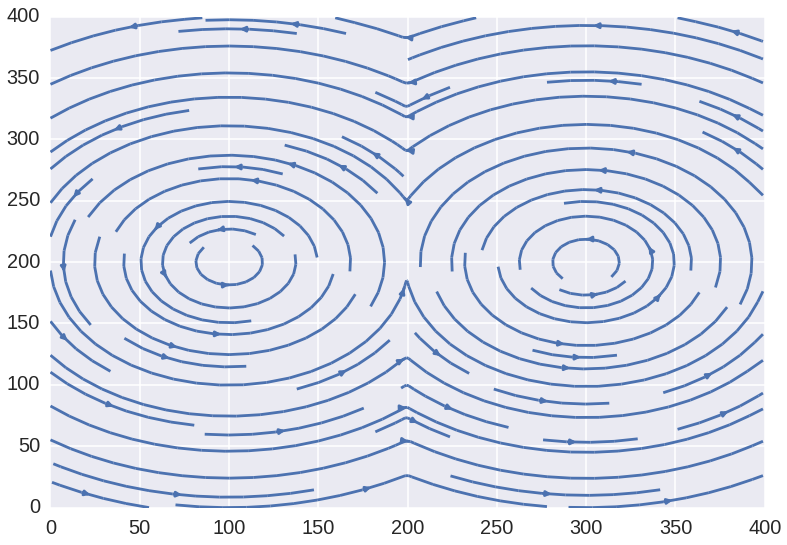

In [13]:
plt.streamplot(xmesh, ymesh, v, u)
plt.savefig('2d_example_flow.png', dpi=200, bbox_inches='tight')

Cool. Let's try this. The fluid should rotate every 10 iterations. We don't want the maximum speed to be greater than $dr/dt$...let's check that they are close at least.

In [14]:
#fi_orig = np.zeros((imax, jmax), dtype=np.double)
#fi_orig[47:53, 47:53] = 0.1
fi_orig = None

D = (.05*dr**2/dt)
s = 0.7

In [15]:
dr/dt

0.25

In [16]:
v.max()

0.02

In [17]:
u.max()

0.0099000000000000008

In [18]:
D

3.125e-05

We set the growth rate large and the diffusion constant small.

In [19]:
sol = Solver(imax=imax, jmax=jmax, kmax=kmax, dt=dt, use_morton=True, s=s,
            v=v, u=u, dr=dr, D=D, fi_orig = fi_orig)

IndexError: tuple index out of range

In [20]:
sol.logical_index_mat.shape

NameError: name 'sol' is not defined

In [22]:
index = np.arange(400*400).reshape((400, 400), order='C')

In [23]:
from adr_2d import morton

In [45]:
index = index.astype(np.float)

In [46]:
ruh_roh = index.copy()

In [47]:
morton.zorder(ruh_roh)

In [48]:
ruh_roh

array([[  0.00000000e+00,   1.02402000e+05,   8.00000000e+00, ...,
          3.97000000e+02,   3.98000000e+02,   3.99000000e+02],
       [  6.55370000e+04,   1.39267000e+05,   6.55450000e+04, ...,
          7.97000000e+02,   7.98000000e+02,   7.99000000e+02],
       [  4.00000000e+00,   1.02406000e+05,   1.20000000e+01, ...,
          1.19700000e+03,   1.19800000e+03,   1.19900000e+03],
       ..., 
       [  1.58800000e+05,   1.58801000e+05,   1.58802000e+05, ...,
          1.59197000e+05,   1.59198000e+05,   1.59199000e+05],
       [  1.59200000e+05,   1.59201000e+05,   1.59202000e+05, ...,
          1.59597000e+05,   1.59598000e+05,   1.59599000e+05],
       [  1.59600000e+05,   1.59601000e+05,   1.59602000e+05, ...,
          1.59997000e+05,   1.59998000e+05,   1.59999000e+05]])

In [76]:
derp = list(morton.zenumerate((2**9, 2**9)))

In [80]:
bloop = np.array(derp)

In [81]:
np.max(bloop[:, 0])

255

In [52]:
index[bloop[:, 0], bloop[:, 1]]

array([  0.00000000e+00,   4.00000000e+02,   1.00000000e+00, ...,
         5.73430000e+04,   5.73430000e+04,   5.73430000e+04])

In [50]:
np.where(index == 1)

(array([], dtype=int64), array([], dtype=int64))

In [41]:
np.where(sol.logical_index_mat == 2)

(array([], dtype=int64), array([], dtype=int64))

In [25]:
sol.logical_to_position_dict[1]

KeyError: 1

In [23]:
result = sol.run(record_images=False)

Done with iteration 0
Minimum (to check for stability): 0.0


KeyError: 1

In [173]:
import adr_2d.morton as bad_morton

In [174]:
nope = np.arange(400*400).reshape((400, 400))

In [175]:
nope

array([[     0,      1,      2, ...,    397,    398,    399],
       [   400,    401,    402, ...,    797,    798,    799],
       [   800,    801,    802, ...,   1197,   1198,   1199],
       ..., 
       [158800, 158801, 158802, ..., 159197, 159198, 159199],
       [159200, 159201, 159202, ..., 159597, 159598, 159599],
       [159600, 159601, 159602, ..., 159997, 159998, 159999]])

In [176]:
bad_morton.zorder(nope)

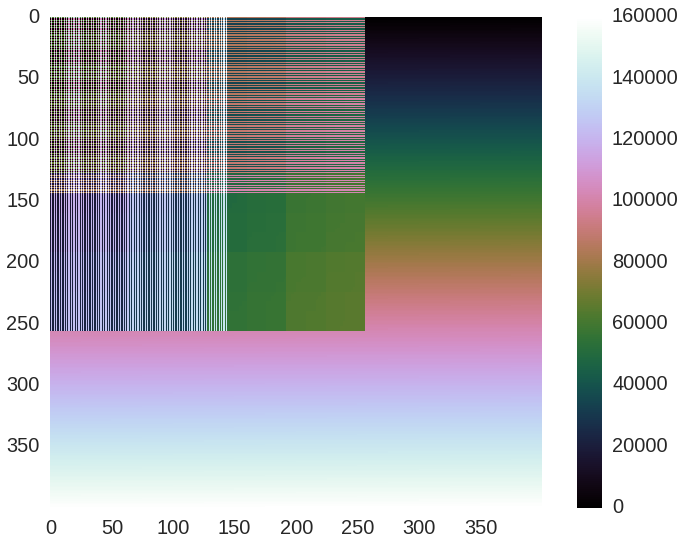

In [179]:
ski.io.imshow(nope)
plt.grid(False)

My algorithm is *very* unstable sadly. Not sure what is up with it. Time's up, however, and perhaps the class can help me debug.

In [226]:
import morpy

In [227]:
import morpy.morton as m

In [229]:
ruhroh = []
for i in range(400*400):
    ruhroh.append(blerp.morton_to_ijk(i))

In [230]:
ruhroh = np.array(ruhroh)

In [105]:
ruhroh[:, 0].max()

383

Oh I see. And now I sort this.

In [107]:
ruhroh

array([[  0,   0],
       [  0,   1],
       [  1,   0],
       ..., 
       [334, 207],
       [335, 206],
       [335, 207]])

In [231]:
index_order = np.arange(400*400)

In [232]:
index_mat = index_order.reshape(400, 400)

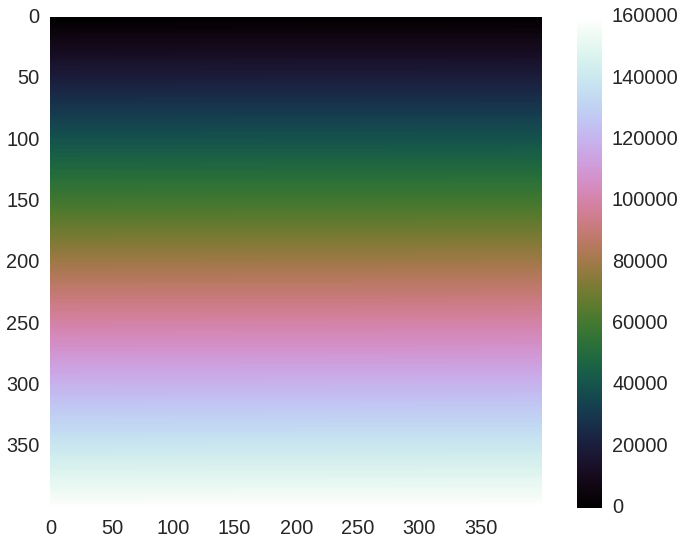

In [233]:
ski.io.imshow(index_mat)
plt.grid(False)

In [234]:
blerp = m.MortonLib(ndim=2)

In [235]:
imax = 400
jmax = 600

indices = np.arange(imax*jmax)

morton_value = np.zeros((imax*jmax), dtype=np.int)
count = 0
for i in range(imax):
    for j in range(jmax):
        morton_value[count] = blerp.ijk_to_morton([i, j])
        count += 1

In [236]:
len(np.unique(morton_value))

240000

In [237]:
morton_order = np.argsort(morton_value)

Aha. Beautiful. That's what we need...

In [238]:
ordered_indices = indices[morton_order]

In [239]:
o = ordered_indices.reshape((imax, jmax))

In [240]:
o

array([[     0,      1,    600, ...,   9615,  10214,  10215],
       [ 10812,  10813,  11412, ...,   8435,   9034,   9035],
       [  7236,   7237,   7836, ...,   9651,  10250,  10251],
       ..., 
       [220196, 220197, 220796, ..., 236923, 237522, 237523],
       [235724, 235725, 236324, ..., 233363, 233962, 233963],
       [234560, 234561, 235160, ..., 239399, 239998, 239999]])

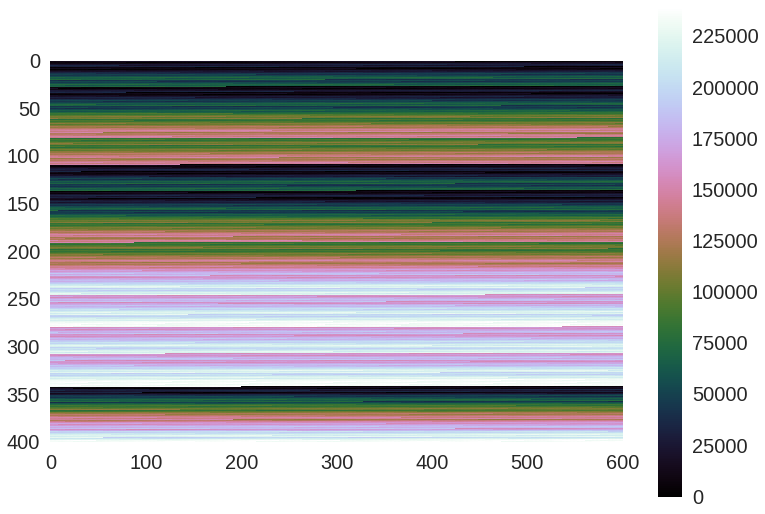

In [249]:
ski.io.imshow(o)
plt.grid(False)

In [241]:
dim = 2
def cmp_zorder(a, b):
    j = 0
    k = 0
    x = 0
    for k in range(dim):
        y = a[k] ^ b[k]
        if less_msb(x, y):
            j = k
            x = y
    return a[j] - b[j]

In [242]:
def less_msb(x, y):
        return x < y and x < (x ^ y)

In [243]:
points = []
for i in range(100):
    for j in range(100):
        points.append([i, j])
points = np.array(points)

In [244]:
point_values = []
for i in range(points.shape[0]):
    point_values.append(cmp_zorder(points[i], [0, 0]))

In [245]:
order = np.argsort(point_values)

In [246]:
indices = np.arange(100*100)
sorted_indices = indices[order]

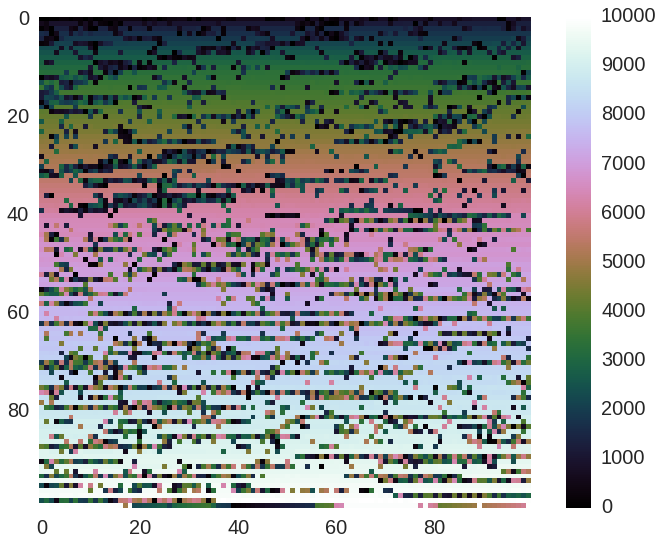

In [247]:
ski.io.imshow(sorted_indices.reshape((100, 100)))
plt.grid(False)

In [ ]:
def get_zorder_like_object(mini_grid=6):